### Goal

Parse json file



In [11]:
import json
import pprint
import pandas as pd

file_path="../data/database_NbThermo.json"

data = {}
with open(file_path, 'r') as file:
    data = json.load(file)

clean_data = []
methods = ['Circular dichroism','DSC','DSF (SYPRO)', 'nanoDSF', 'Other']

for i in range(len(data)):
    mydict = data[i]
    
    tm_value = None
    tm_method = None
    for m in methods:
        if mydict['Tm'][m]['value']:
            tm_value = mydict['Tm'][m]['value']
            tm_method = m
        
    clean_data.append({'id':mydict['id'],
                       'Origin':mydict['Origin']['Source']['value'],
                       'Type':mydict['Origin']['Type']['value'],
                       'Tm_value': tm_value,
                       'Tm_method':tm_method,
                       'Refolding (%)':mydict['Tm']['Refolding (%)']['value'],
                       'Raw':mydict['Sequence']['Raw']['value']
                        })

df = pd.DataFrame(clean_data)
df = df.mask(df == 'NaN')
df = df.mask(df == 'None')

df.to_csv("../data/database_NbThermo.txt", sep="\t", index=False)

In [12]:
df.shape

(548, 7)

    Origin   id
0   Alpaca   35
1    Camel  175
2    Human    2
3    Llama  287
4    Shark   29
5  Unknown   20


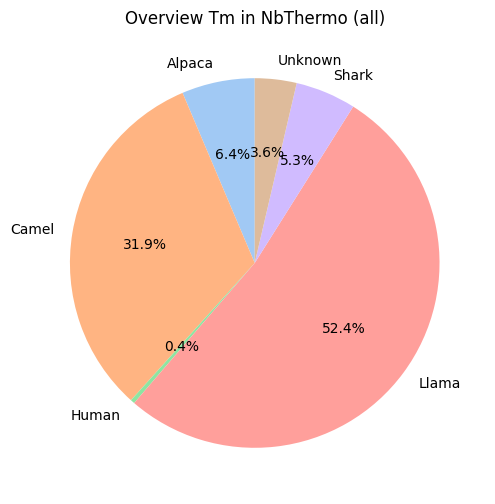

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sample DataFrame
data = df[['id','Origin']].groupby('Origin').count().reset_index()
print(data)

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(data['id'], labels=data['Origin'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

# Add a title
plt.title('Overview Tm in NbThermo (all)')

# Display the plot
plt.savefig('figures/1_overview_NbThermo_all.png')
plt.show()

In [14]:
df.shape

(548, 7)

In [15]:
df[df['Raw'].isna()]

,id,Origin,Type,Tm_value,Tm_method,Refolding (%),Raw
44,00045,Camel,Natural,71.05,nanoDSF,NaN,None
45,00046,Camel,Natural,74.35,nanoDSF,NaN,None
46,00047,Camel,Natural,63.9,nanoDSF,NaN,None
47,00048,Camel,Natural,62.45,nanoDSF,NaN,None
48,00049,Camel,Natural,64.55,nanoDSF,NaN,None
...,...,...,...,...,...,...,...
543,00544,Shark,Semi-Synthetic,53,DSF (SYPRO),NaN,None
544,00545,Shark,Semi-Synthetic,58,DSF (SYPRO),NaN,None
545,00546,Shark,Semi-Synthetic,66,DSF (SYPRO),NaN,None
546,00547,Shark,Semi-Synthetic,62,DSF (SYPRO),NaN,None


In [23]:
df['Tm_value']

0      67.5
1        65
2        62
3        62
4        70
       ... 
543      53
544      58
545      66
546      62
547      60
Name: Tm_value, Length: 548, dtype: object

504


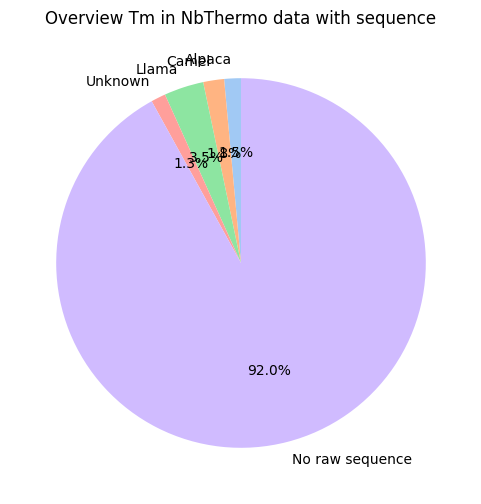

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sample DataFrame
size = df[df['Raw'].isna()].shape[0]
print(size)
data = df.loc[~df['Raw'].isna(),['id','Origin']].groupby('Origin').count().reset_index()
data = pd.concat([data, pd.DataFrame({'id': [size], 'Origin':['No raw sequence']})],ignore_index=True)

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(data['id'], labels=data['Origin'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

# Add a title
plt.title('Overview Tm in NbThermo data with sequence')

# Display the plot
plt.savefig('figures/2_overview_NbThermo_withsequence.png')
plt.show()

/var/folders/t4/w0bqp6_x3fb93sb6l5_vlkn00000gn/T/ipykernel_64556/1813485927.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tm_value'] = df_cleaned['Tm_value'].apply(lambda x: float(str(x).strip()))


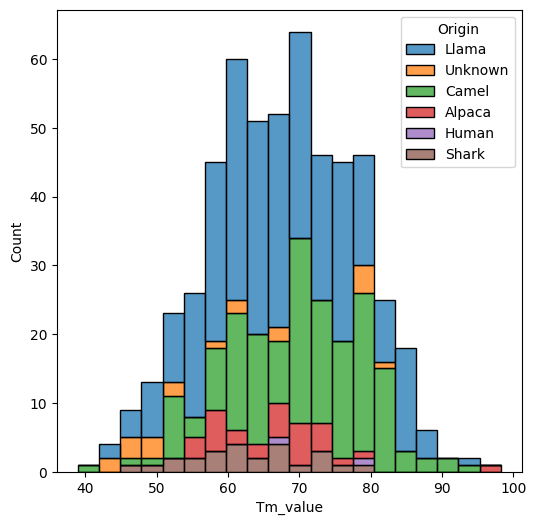

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_cleaned = df.dropna(subset=['Tm_value'])
df_cleaned['Tm_value'] = df_cleaned['Tm_value'].apply(lambda x: float(str(x).strip()))

# Plotting a pie chart
plt.figure(figsize=(6, 6))
sns.histplot(data=df_cleaned, x='Tm_value',hue='Origin', multiple='stack', bins=20)

# Add a title
plt.title('')

# Display the plot
plt.savefig('figures/3_overview_NbThermo_tm.png')
plt.show()

In [39]:
df_cleaned[['Tm_value','Origin']].groupby('Origin').agg(['mean', 'std'])

Tm_value           
              mean        std
Origin                       
Alpaca   66.779032   8.954557
Camel    70.221352   9.601264
Human    72.500000   9.192388
Llama    66.933608   9.986701
Shark    62.640000   8.189831
Unknown  59.625500  13.693687